<a href="https://colab.research.google.com/github/utpalmishra21/IBM-Data-Science-Capstone-Week-5/blob/master/IBMDataScienceBreastCancerEnsemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**BREAST CANCER CLASSIFICATION MODEL**

> Machine learning (ML) can help you use historical data to make better decisions. Paramount exposure of MAchine Learning to the field of medical has made open wider, quicker and cheaper pattern of analysis.

> ML algorithms discover patterns in data, and construct mathematical models using these discoveries. Then you can use the models to make predictions on future data. For example, one possible application of a machine learning model would be to predict how likely a customer is to purchase a particular product based on their past behavior.

> In the collaboratory, we will walk through a Breast Cancer Machine Learning model build on WDBC Dataset. The models comprises steps from installing packages, importing required libraries and data, understanding the features of the data, performing EDA, visual analysis of attributes to modeling on various classification algorithms. Lastly, on the basis on records, bar-plots, pie-chats and choropleth maps are plotted for the breast cancer cases w.r.t Mens, Womens and Globally.

___________________________________________________________________________

> # INTRODUCTION

> 1. INSTALLING PACKAGES
> 2. LIBRARIES
> 3. IMPORTING DATA
> 4. DATA PREPROCESSING
> 5. DATA SPLITTING
> 6. MODELLING
> 7. STATISTICS, EVALUTIONS (using FOURSQUARE and FOLIUM)

____________________________________________________________________________

###INSTALLING PACKAGES

In [ ]:
!pip install handcalcs
!pip install --upgrade keras
!pip install -q tensorflow==2.0beta1

Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.4.3)
     |████████████████████████████████| 87.9MB 71kB/s 
     |████████████████████████████████| 3.1MB 53.0MB/s 
     |████████████████████████████████| 501kB 48.1MB/s 
     |████████████████████████████████| 51kB 5.8MB/s 


###LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import time

In [ ]:
from tqdm import tqdm
import handcalcs.render

In [ ]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
#from pandas.io.json import json_normalize
from pandas import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [ ]:
import random # library for random number generation
import numpy as np # library for vectorized computation
import pandas as pd # library to process data as dataframes

import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 

from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

print('Libraries imported.')

Libraries imported.


In [ ]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
#from pandas.io.json import json_normalize
from pandas import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


###IMPORTING DATA

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
path = "/content/drive/My Drive/data.csv"
data = pd.read_csv(path)

In [ ]:
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


#DATA PREPROCESSING


###DATA DESCRIBTION and INFO

In [ ]:
print(data.shape)
data.describe()

(569, 33)


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

###HISTOGRAM

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f75d085bd30>,
      dtype=object)

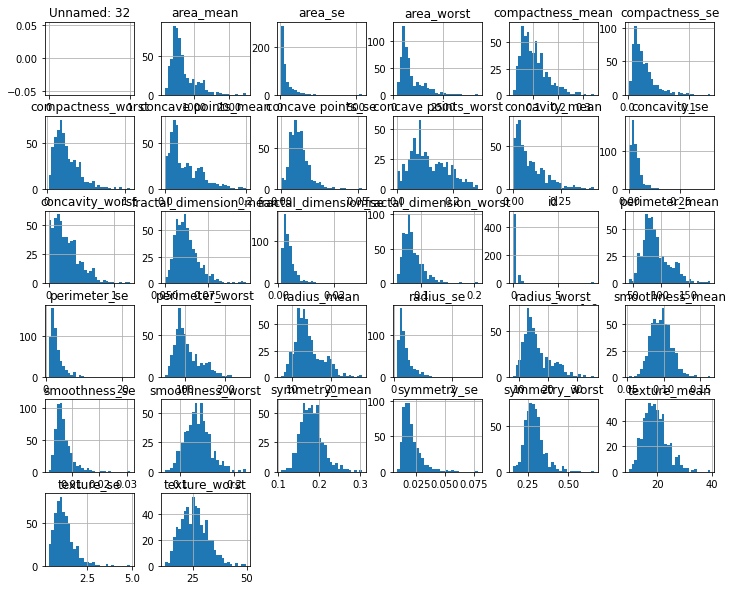

In [ ]:
data.hist(figsize = (12,10), bins=30)

###CHECKING NULL VALUES

In [ ]:
data.isnull().sum() #any()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

###PRE-PROCESSING

In [ ]:
data['diagnosis'] = data['diagnosis'].apply(lambda x: '1' if x == 'M' else '0')
data = data.set_index('id')
del data['Unnamed: 32']
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
842302,1,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,1.0950,0.9053,8.5890,153.400,0.006399,0.049040,0.053730,0.015870,0.030030,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.711900,0.265400,0.4601,0.11890
842517,1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,0.5435,0.7339,3.3980,74.080,0.005225,0.013080,0.018600,0.013400,0.013890,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.241600,0.186000,0.2750,0.08902
84300903,1,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,0.7456,0.7869,4.5850,94.030,0.006150,0.040060,0.038320,0.020580,0.022500,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.450400,0.243000,0.3613,0.08758
84348301,1,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,0.4956,1.1560,3.4450,27.230,0.009110,0.074580,0.056610,0.018670,0.059630,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.686900,0.257500,0.6638,0.17300
84358402,1,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,0.7572,0.7813,5.4380,94.440,0.011490,0.024610,0.056880,0.018850,0.017560,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.400000,0.162500,0.2364,0.07678
843786,1,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,0.3345,0.8902,2.2170,27.190,0.007510,0.033450,0.036720,0.011370,0.021650,0.005082,15.470,23.75,103.40,741.6,0.17910,0.52490,0.535500,0.174100,0.3985,0.12440
844359,1,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,0.4467,0.7732,3.1800,53.910,0.004314,0.013820,0.022540,0.010390,0.013690,0.002179,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.378400,0.193200,0.3063,0.08368
84458202,1,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,0.5835,1.3770,3.8560,50.960,0.008805,0.030290,0.024880,0.014480,0.014860,0.005412,17.060,28.14,110.60,897.0,0.16540,0.36820,0.267800,0.155600,0.3196,0.11510
844981,1,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,0.3063,1.0020,2.4060,24.320,0.005731,0.035020,0.035530,0.012260,0.021430,0.003749,15.490,30.73,106.20,739.3,0.17030,0.54010,0.539000,0.206000,0.4378,0.10720


###CATEGORY COUNTS of DIAGNOSIS Column

In [ ]:
print(data.groupby('diagnosis').size())

diagnosis
0    357
1    212
dtype: int64


###DENSITY PLOTS

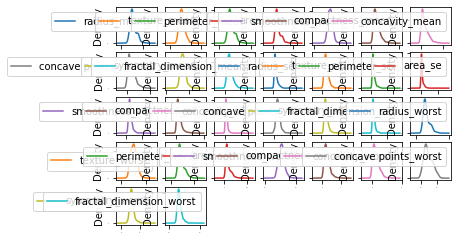

In [ ]:
data.plot(kind='density', subplots=True, layout=(5,7), sharex=False, legend=True, fontsize=1)
plt.show()

###CONFUSION MATRIX

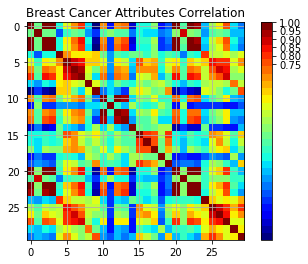

In [ ]:
from matplotlib import cm as cm

fig = plt.figure()
ax1 = fig.add_subplot(111)
cmap = cm.get_cmap('jet', 30)
cax = ax1.imshow(data.corr(), interpolation="none", cmap=cmap)
ax1.grid(True)
plt.title('Breast Cancer Attributes Correlation')
# Add colorbar, make sure to specify tick locations to match desired ticklabels
fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



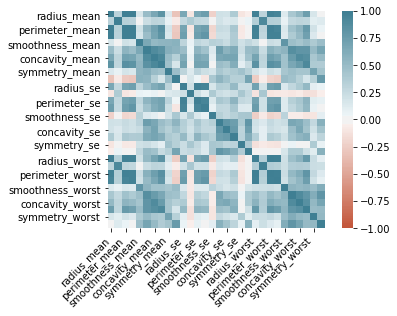

In [ ]:
import seaborn as sns

corr = data.corr()
ax = sns.heatmap(corr, vmin =- 1, vmax = 1, center = 0, 
                  cmap = sns.diverging_palette(20, 220, n=200),
                  square = True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right'
);

#DATA SPLITTING

In [ ]:
Y = data['diagnosis'].values
X = data.drop('diagnosis', axis=1).values

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20, random_state=21)

In [ ]:
print("X_train.shape: ",X_train.shape, "X_test.shape: ",X_test.shape,"Y_train.shape: ", Y_train.shape, "Y_test.shape: ",Y_test.shape)

X_train.shape:  (455, 30) X_test.shape:  (114, 30) Y_train.shape:  (455,) Y_test.shape:  (114,)


#MODELLING

###ENSEMBLE MODELLING USING CROSS VALIDATION

> In statistics and machine learning, ensemble methods use multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone. Unlike a statistical ensemble in statistical mechanics, which is usually infinite, a machine learning ensemble consists of only a concrete finite set of alternative models, but typically allows for much more flexible structure to exist among those alternatives.

> An ensemble is itself a supervised learning algorithm, because it can be trained and then used to make predictions. The trained ensemble, therefore, represents a single hypothesis. This hypothesis, however, is not necessarily contained within the hypothesis space of the models from which it is built. Thus, ensembles can be shown to have more flexibility in the functions they can represent. This flexibility can, in theory, enable them to over-fit the training data more than a single model would, but in practice, some ensemble techniques (especially bagging) tend to reduce problems related to over-fitting of the training data.

In [ ]:
models_list = []
models_list.append(('CART', DecisionTreeClassifier()))
models_list.append(('SVM', SVC())) 
models_list.append(('NB', GaussianNB()))
models_list.append(('KNN', KNeighborsClassifier()))

In [ ]:
num_folds = 10
results = []
names = []

for name, model in models_list:
    kfold = KFold(n_splits=num_folds)
    start = time.time()
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

CART: 0.923140 (0.034533) (run time: 0.090421)
SVM: 0.907681 (0.054723) (run time: 0.056886)
NB: 0.940773 (0.033921) (run time: 0.016277)
KNN: 0.927729 (0.055250) (run time: 0.053397)


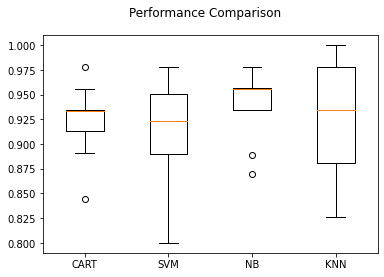

In [ ]:
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

####PIPELINING

In [ ]:
import warnings

# Standardize the dataset
pipelines = []

pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
                                                                        DecisionTreeClassifier())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC( ))])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',
                                                                      GaussianNB())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
                                                                       KNeighborsClassifier())])))
results = []
names = []
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    kfold = KFold(n_splits=num_folds, random_state=123)
    for name, model in pipelines:
        start = time.time()
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
        end = time.time()
        results.append(cv_results)
        names.append(name)
        print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

ScaledCART: 0.918792 (0.034098) (run time: 0.087272)
ScaledSVM: 0.964879 (0.038621) (run time: 0.077617)
ScaledNB: 0.931932 (0.038625) (run time: 0.030075)
ScaledKNN: 0.958357 (0.038595) (run time: 0.059819)


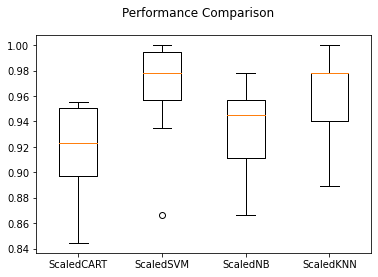

In [ ]:
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

###SUPPORT VECTOR MACHINE

> In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. It presents one of the most robust prediction methods, based on the statistical learning framework. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier (although methods such as Platt scaling exist to use SVM in a probabilistic classification setting). An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on the side of the gap on which they fall.

> In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces.

> When data are unlabelled, supervised learning is not possible, and an unsupervised learning approach is required, which attempts to find natural clustering of the data to groups, and then map new data to these formed groups. The support-vector clustering algorithm, created by Hava Siegelmann and Vladimir Vapnik, applies the statistics of support vectors, developed in the support vector machines algorithm, to categorize unlabeled data, and is one of the most widely used clustering algorithms in industrial applications.

In [ ]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=21)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



Best: 0.969324 using {'C': 2.0, 'kernel': 'rbf'}
0.964976 (0.026211) with: {'C': 0.1, 'kernel': 'linear'}
0.828551 (0.054707) with: {'C': 0.1, 'kernel': 'poly'}
0.940725 (0.038380) with: {'C': 0.1, 'kernel': 'rbf'}
0.949469 (0.032899) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.962754 (0.029531) with: {'C': 0.3, 'kernel': 'linear'}
0.863720 (0.050997) with: {'C': 0.3, 'kernel': 'poly'}
0.956039 (0.032900) with: {'C': 0.3, 'kernel': 'rbf'}
0.960386 (0.029499) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.956184 (0.030988) with: {'C': 0.5, 'kernel': 'linear'}
0.879034 (0.053507) with: {'C': 0.5, 'kernel': 'poly'}
0.964879 (0.030054) with: {'C': 0.5, 'kernel': 'rbf'}
0.956087 (0.027848) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.954010 (0.031644) with: {'C': 0.7, 'kernel': 'linear'}
0.885604 (0.038275) with: {'C': 0.7, 'kernel': 'poly'}
0.967053 (0.037461) with: {'C': 0.7, 'kernel': 'rbf'}
0.949565 (0.027831) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.951836 (0.028830) with: {'C': 0.9, 'kernel': 'linear'

In [ ]:
# prepare the model
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
model = SVC(grid_result.best_params_['C'], grid_result.best_params_['kernel'])
start = time.time()
model.fit(X_train_scaled, Y_train)
end = time.time()
print( "Run Time: %f" % (end-start))

Run Time: 0.009568


In [ ]:
# estimate accuracy on test dataset
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    X_test_scaled = scaler.transform(X_test)
predictions = model.predict(X_test_scaled)

In [ ]:
print(confusion_matrix(Y_test, predictions))

[[74  1]
 [ 0 39]]


In [ ]:
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.12%


In [ ]:
print("Accuracy score %f" % accuracy_score(Y_test, predictions))
print(classification_report(Y_test, predictions))

"""
Accuracy score 0.991228
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        75
           1       0.97      1.00      0.99        39

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114
"""

Accuracy score 0.991228
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        75
           1       0.97      1.00      0.99        39

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



'\nAccuracy score 0.991228\n              precision    recall  f1-score   support\n\n           0       1.00      0.99      0.99        75\n           1       0.97      1.00      0.99        39\n\n    accuracy                           0.99       114\n   macro avg       0.99      0.99      0.99       114\nweighted avg       0.99      0.99      0.99       114\n'

###NAIVE BAYES

> In statistics, Naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naïve) independence assumptions between the features. They are among the simplest Bayesian network models. But they could be coupled with Kernel density estimation and achieve higher accuracy levels.

> Naïve Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features/predictors) in a learning problem. Maximum-likelihood training can be done by evaluating a closed-form expression, which takes linear time, rather than by expensive iterative approximation as used for many other types of classifiers.

> In the statistics and computer science literature, naive Bayes models are known under a variety of names, including simple Bayes and independence Bayes. All these names reference the use of Bayes' theorem in the classifier's decision rule, but naïve Bayes is not (necessarily) a Bayesian meth

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
Y_pred = classifier.predict(X_test)
print(Y_test)
print(Y_pred)

['1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '1'
 '1' '1' '1' '1' '0' '0' '1' '0' '0' '1' '0' '1' '0' '1' '0' '1' '0' '1'
 '0' '1' '0' '1' '1' '0' '1' '0' '0' '1' '0' '0' '0' '1' '1' '1' '1' '0'
 '0' '0' '0' '0' '0' '1' '1' '1' '0' '0' '1' '0' '1' '1' '1' '0' '0' '1'
 '0' '1' '1' '0' '0' '0' '0' '0' '1' '1' '1' '0' '1' '0' '0' '0' '1' '1'
 '0' '1' '0' '1' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '1' '0' '1' '0'
 '1' '1' '0' '1' '1' '0']
['1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '0' '0' '1' '0' '0' '1' '0' '1' '0' '1' '0' '1' '0' '1'
 '0' '1' '0' '1' '0' '0' '1' '0' '1' '1' '0' '0' '0' '1' '1' '1' '1' '0'
 '0' '0' '0' '0' '0' '1' '1' '1' '0' '0' '1' '0' '1' '1' '1' '0' '0' '1'
 '0' '0' '1' '0' '0' '0' '0' '0' '1' '1' '1' '0' '1' '0' '0' '0' '1' '1'
 '0' '0' '0' '1' '0' '0' '1' '1' '0' '0' '0' '0' '0' '0' '1' '0' '1' '0'
 '0' '0' '0' '1' '1' '0']


In [ ]:
classifier.score(X_test, Y_test)

0.9035087719298246

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[61  6]
 [ 5 42]]


In [ ]:
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 90.35%


In [ ]:
print("Accuracy score %f" % accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, predictions))

"""
Accuracy score 0.903509
              precision    recall  f1-score   support

           0       0.59      0.66      0.62        67
           1       0.42      0.36      0.39        47

    accuracy                           0.54       114
   macro avg       0.51      0.51      0.51       114
weighted avg       0.52      0.54      0.53       114
"""

Accuracy score 0.903509
              precision    recall  f1-score   support

           0       0.59      0.66      0.62        67
           1       0.42      0.36      0.39        47

    accuracy                           0.54       114
   macro avg       0.51      0.51      0.51       114
weighted avg       0.52      0.54      0.53       114



'\nAccuracy score 0.903509\n              precision    recall  f1-score   support\n\n           0       0.59      0.66      0.62        67\n           1       0.42      0.36      0.39        47\n\n    accuracy                           0.54       114\n   macro avg       0.51      0.51      0.51       114\nweighted avg       0.52      0.54      0.53       114\n'

###DECISION TREE

> A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). The paths from root to leaf represent classification rules.

> In decision analysis, a decision tree and the closely related influence diagram are used as a visual and analytical decision support tool, where the expected values (or expected utility) of competing alternatives are calculated.

> A decision tree consists of three types of nodes:

Decision nodes – typically represented by squares
Chance nodes – typically represented by circles
End nodes – typically represented by triangles


> Decision trees are commonly used in operations research and operations management. If, in practice, decisions have to be taken online with no recall under incomplete knowledge, a decision tree should be paralleled by a probability model as a best choice model or online selection model algorithm. Another use of decision trees is as a descriptive means for calculating conditional probabilities.

> Decision trees, influence diagrams, utility functions, and other decision analysis tools and methods are taught to undergraduate students in schools of business, health economics, and public health, and are examples of operations research or management science methods.

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

In [ ]:
print(X.shape)
print(Y.shape)

(17070, 1)
(569, 1)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT_classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
DT_classifier.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
Y_pred = DT_classifier.predict(X_test)
print(Y_test)
print(Y_pred)

['1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '1'
 '1' '1' '1' '1' '0' '0' '1' '0' '0' '1' '0' '1' '0' '1' '0' '1' '0' '1'
 '0' '1' '0' '1' '1' '0' '1' '0' '0' '1' '0' '0' '0' '1' '1' '1' '1' '0'
 '0' '0' '0' '0' '0' '1' '1' '1' '0' '0' '1' '0' '1' '1' '1' '0' '0' '1'
 '0' '1' '1' '0' '0' '0' '0' '0' '1' '1' '1' '0' '1' '0' '0' '0' '1' '1'
 '0' '1' '0' '1' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '1' '0' '1' '0'
 '1' '1' '0' '1' '1' '0']
['1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '1' '0' '1'
 '1' '1' '1' '1' '0' '0' '1' '0' '0' '1' '0' '1' '0' '1' '0' '1' '0' '1'
 '0' '1' '0' '1' '1' '0' '1' '0' '0' '1' '0' '1' '0' '1' '1' '1' '0' '0'
 '0' '0' '0' '0' '0' '1' '1' '1' '0' '0' '1' '0' '1' '1' '1' '0' '1' '1'
 '0' '0' '1' '0' '0' '0' '0' '0' '1' '1' '1' '0' '1' '0' '0' '0' '1' '1'
 '0' '1' '1' '1' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '1' '0' '1' '0'
 '1' '0' '0' '1' '1' '1']


In [ ]:
DT_classifier.score(X_test, Y_test)
DT_classifier.fit(X_test,Y_test)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[62  5]
 [ 3 44]]


In [ ]:
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 92.98%


In [ ]:
print("Accuracy score %f" % accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

"""
Accuracy score 0.929825
              precision    recall  f1-score   support

           0       0.59      0.66      0.62        67
           1       0.42      0.36      0.39        47

    accuracy                           0.54       114
   macro avg       0.51      0.51      0.51       114
weighted avg       0.52      0.54      0.53       114
"""

Accuracy score 0.929825
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        67
           1       0.90      0.94      0.92        47

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



'\nAccuracy score 0.929825\n              precision    recall  f1-score   support\n\n           0       0.59      0.66      0.62        67\n           1       0.42      0.36      0.39        47\n\n    accuracy                           0.54       114\n   macro avg       0.51      0.51      0.51       114\nweighted avg       0.52      0.54      0.53       114\n'

In [ ]:
!pip install pydotplus

In [ ]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



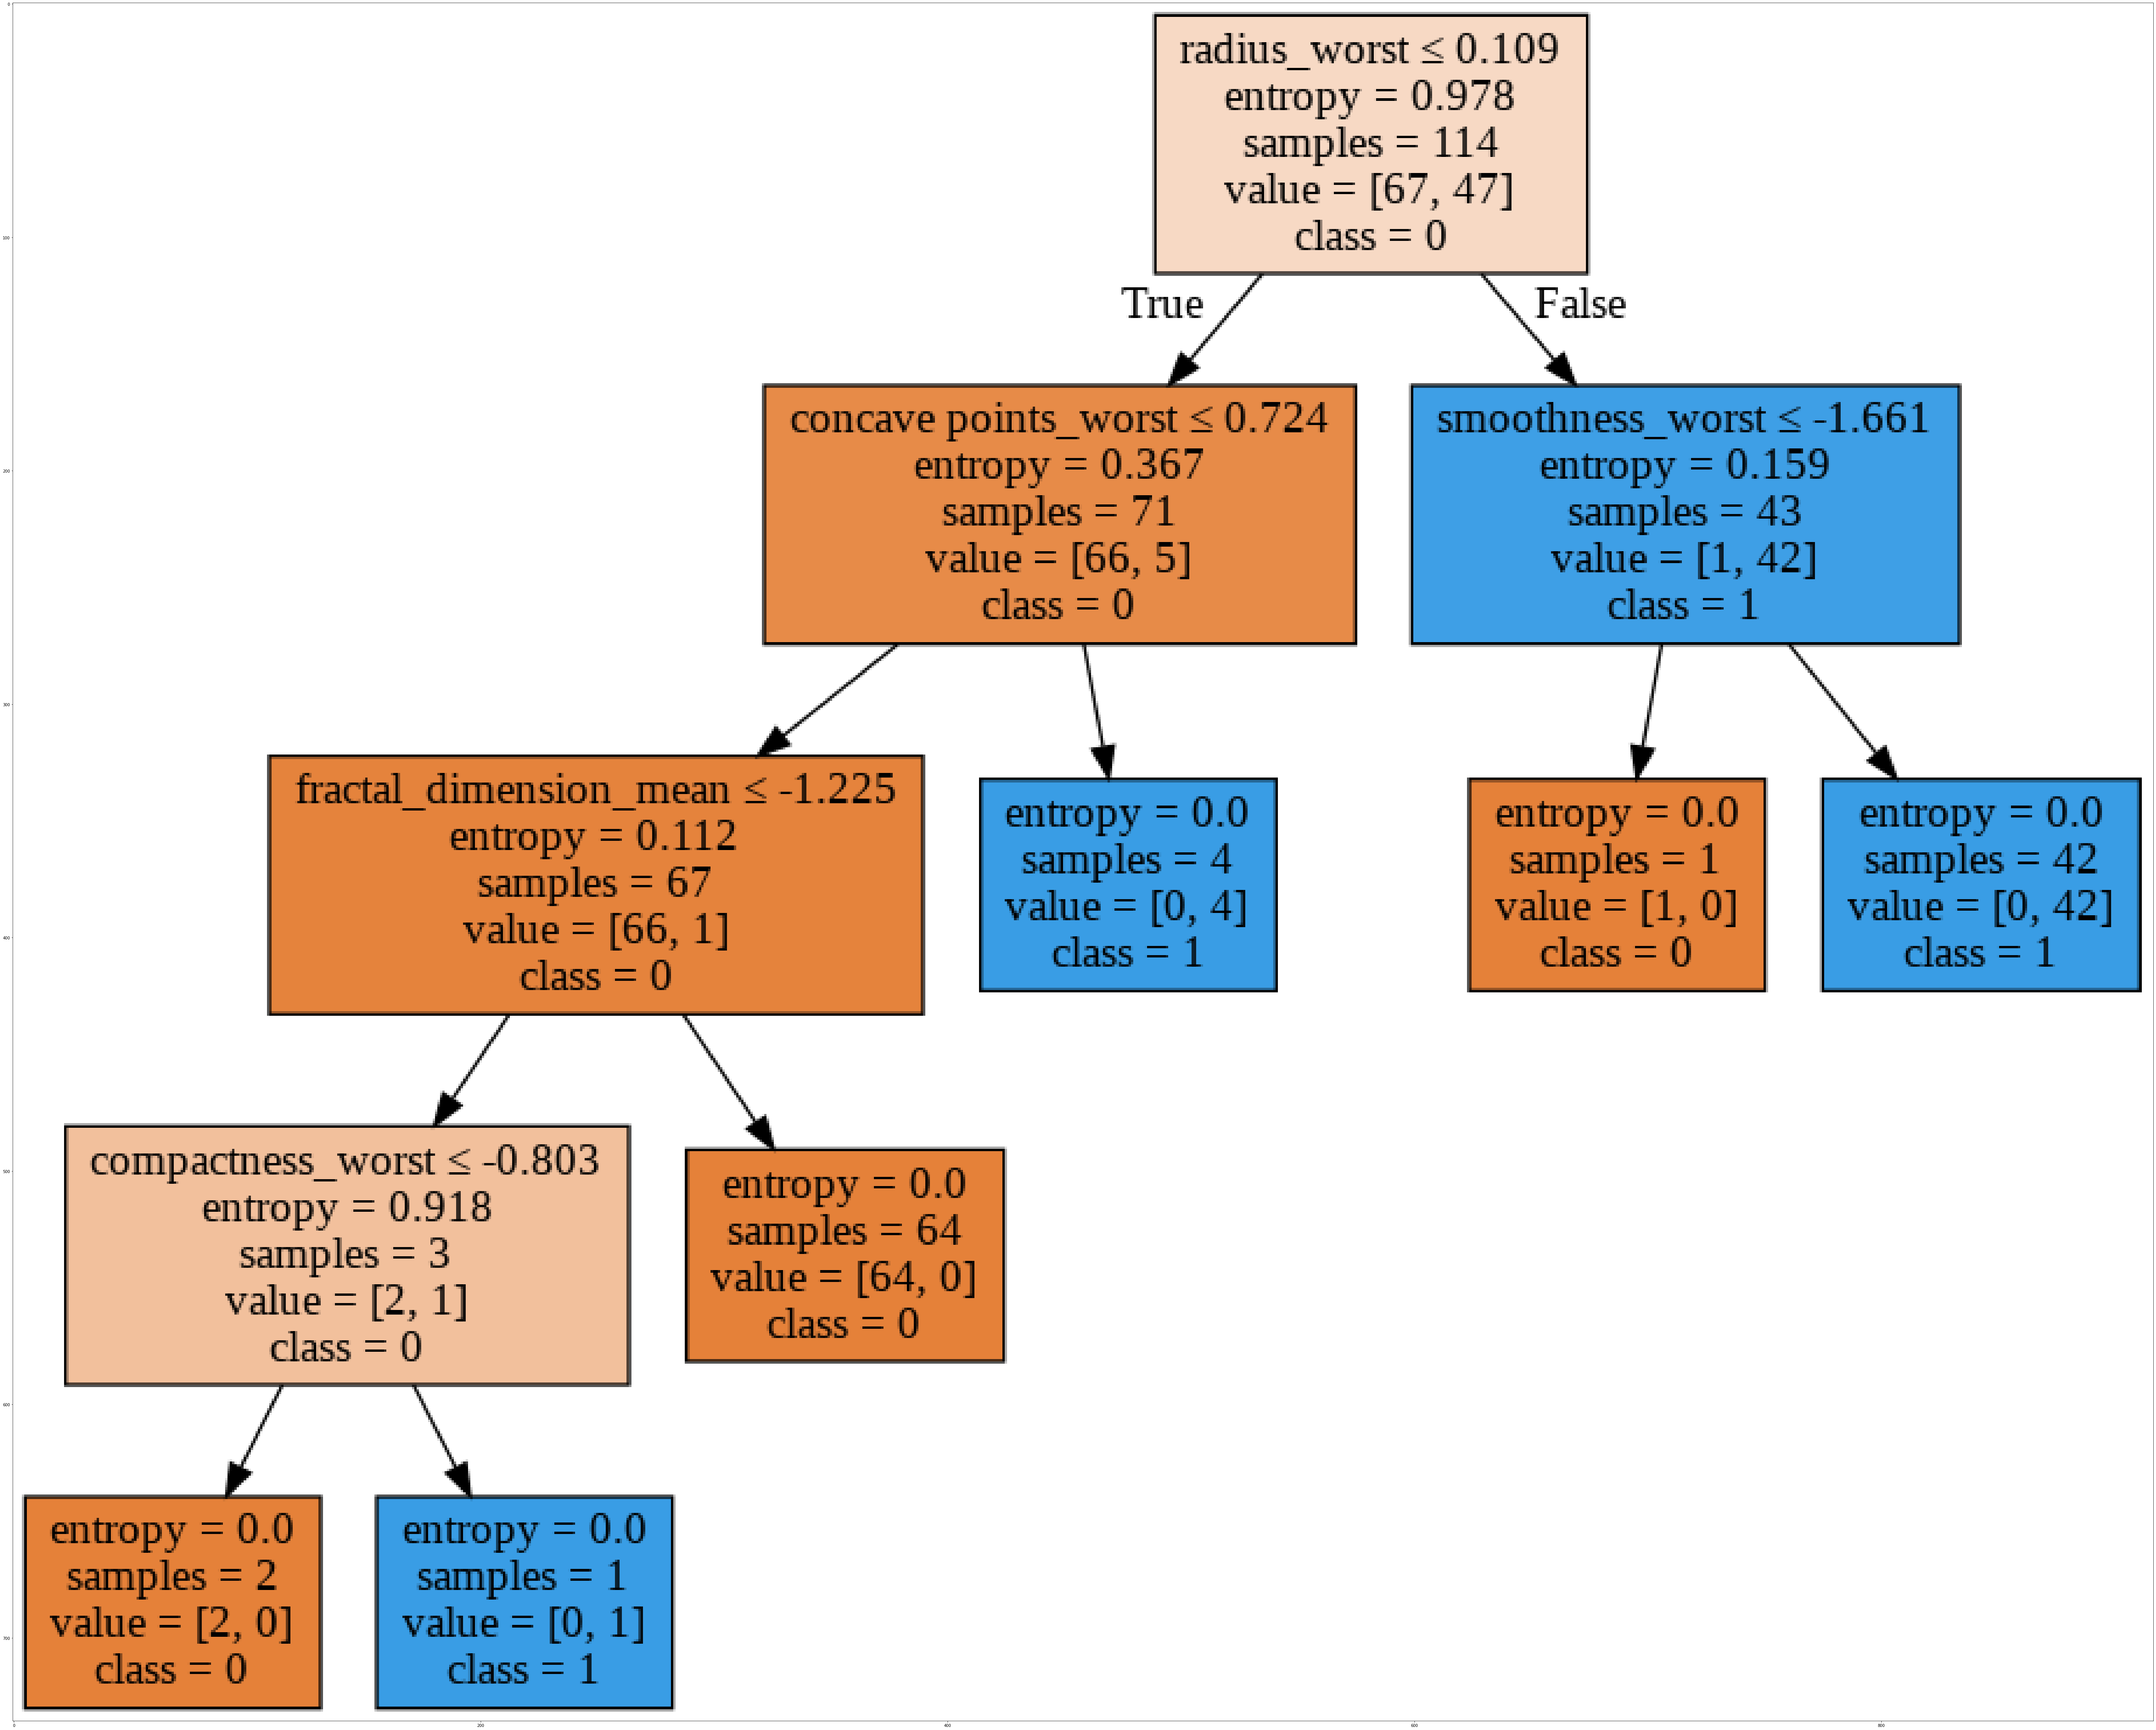

In [ ]:
dot_data = StringIO()
filename = "loantree.png"
featureNames = data.columns[1:]
targetNames = data["diagnosis"].unique().tolist()
out=tree.export_graphviz(DT_classifier,feature_names=featureNames, out_file=dot_data, class_names= np.unique(Y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

###DECISON TREE BAGGING

> Bootstrap aggregating, also called bagging (from bootstrap aggregating), is a machine learning ensemble meta-algorithm designed to improve the stability and accuracy of machine learning algorithms used in statistical classification and regression. It also reduces variance and helps to avoid overfitting. Although it is usually applied to decision tree methods, it can be used with any type of method. Bagging is a special case of the model averaging approach

In [ ]:
from sklearn.ensemble import BaggingClassifier
Bagging = BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5, max_features=0.5)

In [ ]:
Bagging.fit(X_train, Y_train)
BPred = Bagging.predict(X_test)
print(Y_test, BPred)

['1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '1'
 '1' '1' '1' '1' '0' '0' '1' '0' '0' '1' '0' '1' '0' '1' '0' '1' '0' '1'
 '0' '1' '0' '1' '1' '0' '1' '0' '0' '1' '0' '0' '0' '1' '1' '1' '1' '0'
 '0' '0' '0' '0' '0' '1' '1' '1' '0' '0' '1' '0' '1' '1' '1' '0' '0' '1'
 '0' '1' '1' '0' '0' '0' '0' '0' '1' '1' '1' '0' '1' '0' '0' '0' '1' '1'
 '0' '1' '0' '1' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '1' '0' '1' '0'
 '1' '1' '0' '1' '1' '0'] ['1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '1' '0' '1' '0' '1'
 '1' '1' '1' '1' '0' '0' '1' '0' '0' '1' '0' '1' '0' '1' '0' '1' '0' '1'
 '0' '1' '0' '1' '1' '0' '1' '0' '0' '1' '0' '0' '0' '1' '1' '1' '1' '0'
 '0' '0' '0' '0' '0' '1' '1' '1' '0' '0' '1' '0' '1' '1' '1' '0' '0' '1'
 '0' '0' '1' '0' '0' '0' '0' '0' '1' '1' '1' '0' '1' '0' '0' '0' '1' '1'
 '0' '1' '0' '1' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '1' '0' '1' '0'
 '1' '1' '0' '1' '1' '0']


In [ ]:
Bagging.score(X_test, Y_test)

0.9736842105263158

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[62  5]
 [ 3 44]]


In [ ]:
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 92.98%


In [ ]:
print("Accuracy score %f" % accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, predictions))

"""
Accuracy score 0.929825
              precision    recall  f1-score   support

           0       0.59      0.66      0.62        67
           1       0.42      0.36      0.39        47

    accuracy                           0.54       114
   macro avg       0.51      0.51      0.51       114
weighted avg       0.52      0.54      0.53       114
"""

Accuracy score 0.929825
              precision    recall  f1-score   support

           0       0.59      0.66      0.62        67
           1       0.42      0.36      0.39        47

    accuracy                           0.54       114
   macro avg       0.51      0.51      0.51       114
weighted avg       0.52      0.54      0.53       114



'\nAccuracy score 0.929825\n              precision    recall  f1-score   support\n\n           0       0.59      0.66      0.62        67\n           1       0.42      0.36      0.39        47\n\n    accuracy                           0.54       114\n   macro avg       0.51      0.51      0.51       114\nweighted avg       0.52      0.54      0.53       114\n'

###EXTRA TREE CLASSFIER

> Extremely Randomized Trees Classifier(Extra Trees Classifier) is a type of ensemble learning technique which aggregates the results of multiple de-correlated decision trees collected in a “forest” to output it’s classification result. In concept, it is very similar to a Random Forest Classifier and only differs from it in the manner of construction of the decision trees in the forest.

> Each Decision Tree in the Extra Trees Forest is constructed from the original training sample. Then, at each test node, Each tree is provided with a random sample of k features from the feature-set from which each decision tree must select the best feature to split the data based on some mathematical criteria (typically the Gini Index). This random sample of features leads to the creation of multiple de-correlated decision trees.

> To perform feature selection using the above forest structure, during the construction of the forest, for each feature, the normalized total reduction in the mathematical criteria used in the decision of feature of split (Gini Index if the Gini Index is used in the construction of the forest) is computed. This value is called the Gini Importance of the feature. To perform feature selection, each feature is ordered in descending order according to the Gini Importance of each feature and the user selects the top k features according to his/her choice.

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
ET_Classifier = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)

ET_Classifier.fit(X_train, Y_train)
ET_Classifier.score(X_train, Y_train)

ETPred = ET_Classifier.predict(X_test)
ET_Classifier.score(X_test, Y_test)

0.9649122807017544

In [ ]:
Y_test, ET_Classifier.predict(X_test)

(array(['1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '1', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0',
        '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0',
        '1', '1', '0', '1', '0', '0', '1', '0', '0', '0', '1', '1', '1',
        '1', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '1',
        '0', '1', '1', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0',
        '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '1', '1', '0',
        '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0',
        '1', '0', '1', '0', '1', '1', '0', '1', '1', '0'], dtype=object),
 array(['1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0',
        '0', '0', '1', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0',
        '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0',
        '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '1', '1',
        '1', '0', '0', '0', '0', '0', '0', '1', '1

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[62  5]
 [ 3 44]]


In [ ]:
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 92.98%


In [ ]:
print("Accuracy score %f" % accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, predictions))

"""
Accuracy score 0.929825
              precision    recall  f1-score   support

           0       0.59      0.66      0.62        67
           1       0.42      0.36      0.39        47

    accuracy                           0.54       114
   macro avg       0.51      0.51      0.51       114
weighted avg       0.52      0.54      0.53       114
"""

Accuracy score 0.929825
              precision    recall  f1-score   support

           0       0.59      0.66      0.62        67
           1       0.42      0.36      0.39        47

    accuracy                           0.54       114
   macro avg       0.51      0.51      0.51       114
weighted avg       0.52      0.54      0.53       114



'\nAccuracy score 0.929825\n              precision    recall  f1-score   support\n\n           0       0.59      0.66      0.62        67\n           1       0.42      0.36      0.39        47\n\n    accuracy                           0.54       114\n   macro avg       0.51      0.51      0.51       114\nweighted avg       0.52      0.54      0.53       114\n'

###RANDOM FOREST

> Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set.

> An extension of the algorithm was developed by Leo Breiman and Adele Cutler, who registered "Random Forests" as a trademark (as of 2019, owned by Minitab, Inc.). The extension combines Breiman's "bagging" idea and random selection of features, to construct a collection of decision trees with controlled variance.

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier(criterion='entropy', random_state=0)
RF_classifier.fit(X_train,Y_train)
Y_pred = RF_classifier.predict(X_test)
RF_classifier.score(X_test, Y_test)

0.9736842105263158

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[66  1]
 [ 2 45]]


In [ ]:
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.37%


In [ ]:
print("Accuracy score %f" % accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, predictions))

"""
Accuracy score 0.973684
              precision    recall  f1-score   support

           0       0.59      0.66      0.62        67
           1       0.42      0.36      0.39        47

    accuracy                           0.54       114
   macro avg       0.51      0.51      0.51       114
weighted avg       0.52      0.54      0.53       114
"""

Accuracy score 0.973684
              precision    recall  f1-score   support

           0       0.59      0.66      0.62        67
           1       0.42      0.36      0.39        47

    accuracy                           0.54       114
   macro avg       0.51      0.51      0.51       114
weighted avg       0.52      0.54      0.53       114



'\nAccuracy score 0.973684\n              precision    recall  f1-score   support\n\n           0       0.59      0.66      0.62        67\n           1       0.42      0.36      0.39        47\n\n    accuracy                           0.54       114\n   macro avg       0.51      0.51      0.51       114\nweighted avg       0.52      0.54      0.53       114\n'

###GRADIANT DESCENT CLASSIFIER

> Linear classifiers (SVM, logistic regression, etc.) with SGD training.

> This estimator implements regularized linear models with stochastic gradient descent (SGD) learning: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate). SGD allows minibatch (online/out-of-core) learning via the partial_fit method. For best results using the default learning rate schedule, the data should have zero mean and unit variance.

> This implementation works with data represented as dense or sparse arrays of floating point values for the features. The model it fits can be controlled with the loss parameter; by default, it fits a linear support vector machine (SVM).

> The regularizer is a penalty added to the loss function that shrinks model parameters towards the zero vector using either the squared euclidean norm L2 or the absolute norm L1 or a combination of both (Elastic Net). If the parameter update crosses the 0.0 value because of the regularizer, the update is truncated to 0.0 to allow for learning sparse models and achieve online feature selection.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBClassifier = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
GBClassifier.fit(X_train, Y_train)

GBPred = GBClassifier.predict(X_test)
GBClassifier.score(X_test, Y_test)

0.9736842105263158

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, GBPred)
print(cm)

[[66  1]
 [ 2 45]]


In [ ]:
accuracy = accuracy_score(Y_test, GBPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.37%


In [ ]:
print("Accuracy score %f" % accuracy_score(Y_test, GBPred))
print(classification_report(Y_test, predictions))

"""
Accuracy score 0.973684
              precision    recall  f1-score   support

           0       0.59      0.66      0.62        67
           1       0.42      0.36      0.39        47

    accuracy                           0.54       114
   macro avg       0.51      0.51      0.51       114
weighted avg       0.52      0.54      0.53       114
"""

Accuracy score 0.973684
              precision    recall  f1-score   support

           0       0.59      0.66      0.62        67
           1       0.42      0.36      0.39        47

    accuracy                           0.54       114
   macro avg       0.51      0.51      0.51       114
weighted avg       0.52      0.54      0.53       114



'\nAccuracy score 0.973684\n              precision    recall  f1-score   support\n\n           0       0.59      0.66      0.62        67\n           1       0.42      0.36      0.39        47\n\n    accuracy                           0.54       114\n   macro avg       0.51      0.51      0.51       114\nweighted avg       0.52      0.54      0.53       114\n'

###XGBOOST

> The library is laser focused on computational speed and model performance, as such there are few frills. Nevertheless, it does offer a number of advanced features.

> Model Features: The implementation of the model supports the features of the scikit-learn and R implementations, with new additions like regularization. Three main forms of gradient boosting are supported:

> Gradient Boosting algorithm also called gradient boosting machine including the learning rate. Stochastic Gradient Boosting with sub-sampling at the row, column and column per split levels. Regularized Gradient Boosting with both L1 and L2 regularization. 

> System Features: The library provides a system for use in a range of computing environments, not least:

> Parallelization of tree construction using all of your CPU cores during training. Distributed Computing for training very large models using a cluster of machines. Out-of-Core Computing for very large datasets that don’t fit into memory. Cache Optimization of data structures and algorithm to make best use of hardware.

> Algorithm Features: The implementation of the algorithm was engineered for efficiency of compute time and memory resources. A design goal was to make the best use of available resources to train the model. Some key algorithm implementation features include:

> Sparse Aware implementation with automatic handling of missing data values.
Block Structure to support the parallelization of tree construction.
Continued Training so that you can further boost an already fitted model on new data.
> XGBoost is free open source software available for use under the permissive Apache-2 license.

In [ ]:
Y = data['diagnosis'].values
X = data.drop('diagnosis', axis=1).values

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20, random_state=21)

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
import xgboost

XGBModel = xgboost.XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75)
XGBModel.fit(X_train, Y_train , verbose=False)

XGB_pred = XGBModel.predict(X_test)

In [ ]:
XGBPred = []
for i in XGB_pred:
  for k in i:
    XGBPred.append(str(int(k)))

XGBPred = np.array(XGBPred)
XGBPred

array(['0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0',
       '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0',
       '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '1', '1', '1', '1', '0', '0', '1', '0', '1', '1',
       '1', '0', '0', '1', '0', '1', '1', '1', '1', '1', '0', '0', '0',
       '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0',
       '0', '1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0',
       '1', '0', '0', '0', '0', '1', '1', '0', '0', '1'], dtype='<U1')

In [ ]:
accuracy = accuracy_score(Y_test, XGBPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.37%


In [ ]:
print("Accuracy score %f" % accuracy_score(Y_test, XGBPred))
print(classification_report(Y_test, XGBPred))

"""
Accuracy score 0.973684
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        75
           1       0.97      0.95      0.96        39

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114
"""

Accuracy score 0.973684
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        75
           1       0.97      0.95      0.96        39

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



'\nAccuracy score 0.973684\n              precision    recall  f1-score   support\n\n           0       0.97      0.99      0.98        75\n           1       0.97      0.95      0.96        39\n\n    accuracy                           0.97       114\n   macro avg       0.97      0.97      0.97       114\nweighted avg       0.97      0.97      0.97       114\n'

###ADABOOST

> AdaBoost is best used to boost the performance of decision trees on binary classification problems.

> AdaBoost was originally called AdaBoost.M1 by the authors of the technique Freund and Schapire. More recently it may be referred to as discrete AdaBoost because it is used for classification rather than regression.

> AdaBoost can be used to boost the performance of any machine learning algorithm. It is best used with weak learners. These are models that achieve accuracy just above random chance on a classification problem.

> The most suited and therefore most common algorithm used with AdaBoost are decision trees with one level. Because these trees are so short and only contain one decision for classification, they are often called decision stumps.

> Each instance in the training dataset is weighted. The initial weight is set to:

> weight(xi) = 1/n

> Where xi is the i’th training instance and n is the number of training instances.

In [ ]:
Y = data['diagnosis'].values
X = data.drop('diagnosis', axis=1).values

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20, random_state=21)

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ADABoostClassifier = AdaBoostClassifier()
ADABoostClassifier.fit(X_train, Y_train)

ADAB_pred = ADABoostClassifier.predict(X_test)

In [ ]:
ADABPred = []
for i in ADAB_pred:
  for k in i:
    ADABPred.append(str(int(k)))

ADABPred = np.array(ADABPred)
ADABPred

array(['0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0',
       '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0',
       '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '1', '1', '1', '1', '0', '0', '1', '0', '1', '1',
       '1', '0', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0',
       '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0',
       '0', '1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0',
       '1', '0', '0', '0', '0', '1', '1', '0', '0', '1'], dtype='<U1')

In [ ]:
accuracy = accuracy_score(Y_test, ADABPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.25%


In [ ]:
print("Accuracy score %f" % accuracy_score(Y_test, ADABPred))
print(classification_report(Y_test, ADABPred))

"""
Accuracy score 0.982456
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        75
           1       1.00      0.95      0.97        39

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114
"""

Accuracy score 0.982456
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        75
           1       1.00      0.95      0.97        39

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114



'\nAccuracy score 0.982456\n              precision    recall  f1-score   support\n\n           0       0.97      1.00      0.99        75\n           1       1.00      0.95      0.97        39\n\n    accuracy                           0.98       114\n   macro avg       0.99      0.97      0.98       114\nweighted avg       0.98      0.98      0.98       114\n'

###CATBOOST

> CatBoost is a recently open-sourced machine learning algorithm from Yandex. It can easily integrate with deep learning frameworks like Google’s TensorFlow and Apple’s Core ML. It can work with diverse data types to help solve a wide range of problems that businesses face today. To top it up, it provides best-in-class accuracy.

> It is especially powerful in two ways:

> It yields state-of-the-art results without extensive data training typically required by other machine learning methods, and
Provides powerful out-of-the-box support for the more descriptive data formats that accompany many business problems.
“CatBoost” name comes from two words “Category” and “Boosting”.

> As discussed, the library works well with multiple Categories of data, such as audio, text, image including historical data.

> “Boost” comes from gradient boosting machine learning algorithm as this library is based on gradient boosting library. Gradient boosting is a powerful machine learning algorithm that is widely applied to multiple types of business challenges like fraud detection, recommendation items, forecasting and it performs well also. It can also return very good result with relatively less data, unlike DL models that need to learn from a massive amount of data.

In [ ]:
!pip install catboost

     |████████████████████████████████| 66.1MB 55kB/s 


In [ ]:
Y = data['diagnosis'].values
X = data.drop('diagnosis', axis=1).values

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20, random_state=21)

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
from catboost import CatBoostClassifier
CatBoostClassifier = AdaBoostClassifier()
CatBoostClassifier.fit(X_train, Y_train)

CATB_pred = CatBoostClassifier.predict(X_test)

In [ ]:
CATBPred = []
for i in CATB_pred:
  for k in i:
    CATBPred.append(str(int(k)))

CATBPred = np.array(CATBPred)
CATBPred

array(['0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0',
       '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0',
       '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '1', '1', '1', '1', '0', '0', '1', '0', '1', '1',
       '1', '0', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0',
       '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0',
       '0', '1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0',
       '1', '0', '0', '0', '0', '1', '1', '0', '0', '1'], dtype='<U1')

In [ ]:
accuracy = accuracy_score(Y_test, CATBPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.25%


In [ ]:
print("Accuracy score %f" % accuracy_score(Y_test, CATBPred))
print(classification_report(Y_test, CATBPred))

"""
Accuracy score 0.982456
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        75
           1       1.00      0.95      0.97        39

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114
"""

Accuracy score 0.982456
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        75
           1       1.00      0.95      0.97        39

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114



'\nAccuracy score 0.982456\n              precision    recall  f1-score   support\n\n           0       0.97      1.00      0.99        75\n           1       1.00      0.95      0.97        39\n\n    accuracy                           0.98       114\n   macro avg       0.99      0.97      0.98       114\nweighted avg       0.98      0.98      0.98       114\n'

###GENETIC ALGORITHM

>A genetic algorithm is a search heuristic that is inspired by Charles Darwin's theory of natural evolution. This algorithm reflects the process of natural selection where the fittest individuals are selected for reproduction in order to produce offspring of the next generation.

In [ ]:
!pip install tpot

     |████████████████████████████████| 92kB 2.5MB/s 
     |████████████████████████████████| 163kB 8.5MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp36-none-any.whl size=11956 sha256=d10e6400b8af25b785d156760d8e5198ad8f97b29b663ffc4d2c9e040e0c7874
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit


In [ ]:
Y = data['diagnosis'].values
X = data.drop('diagnosis', axis=1).values

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20, random_state=21)

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
from tpot import TPOTClassifier

TPOT = TPOTClassifier()
TPOT.fit(X_train, Y_train)

TPOT_pred = TPOT.predict(X_test)

In [ ]:
TPOTPred = []
for i in TPOT_pred:
  for k in i:
    TPOTPred.append(str(int(k)))

TPOTPred = np.array(TPOTPred)
TPOTPred

array(['0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0',
       '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0',
       '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0',
       '0', '1', '0', '1', '1', '1', '1', '0', '0', '1', '0', '1', '1',
       '1', '0', '0', '1', '0', '1', '1', '0', '1', '1', '0', '0', '0',
       '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0',
       '0', '1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0',
       '1', '0', '0', '0', '0', '1', '1', '0', '0', '1'], dtype='<U1')

In [ ]:
accuracy = accuracy_score(Y_test, TPOTPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 100.00%


In [ ]:
print("Accuracy score %f" % accuracy_score(Y_test, TPOTPred))
print(classification_report(Y_test, TPOTPred))

"""
Accuracy score 0.973684
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        75
           1       0.93      1.00      0.96        39

    accuracy                           0.97       114
   macro avg       0.96      0.98      0.97       114
weighted avg       0.98      0.97      0.97       114
"""

Accuracy score 1.000000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        39

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



'\nAccuracy score 0.973684\n              precision    recall  f1-score   support\n\n           0       1.00      0.96      0.98        75\n           1       0.93      1.00      0.96        39\n\n    accuracy                           0.97       114\n   macro avg       0.96      0.98      0.97       114\nweighted avg       0.98      0.97      0.97       114\n'

###ARTIFICIAL NEURAL NETWORK

>Artificial neural networks (ANNs), usually simply called neural networks (NNs), are computing systems vaguely inspired by the biological neural networks that constitute animal brains.

>An ANN is based on a collection of connected units or nodes called artificial neurons, which loosely model the neurons in a biological brain. Each connection, like the synapses in a biological brain, can transmit a signal to other neurons. An artificial neuron that receives a signal then processes it and can signal neurons connected to it. The "signal" at a connection is a real number, and the output of each neuron is computed by some non-linear function of the sum of its inputs. The connections are called edges. Neurons and edges typically have a weight that adjusts as learning proceeds. The weight increases or decreases the strength of the signal at a connection. Neurons may have a threshold such that a signal is sent only if the aggregate signal crosses that threshold. Typically, neurons are aggregated into layers. Different layers may perform different transformations on their inputs. Signals travel from the first layer (the input layer), to the last layer (the output layer), possibly after traversing the layers multiple times.

In [ ]:
!pip install tensorflow==2.2

     |████████████████████████████████| 516.2MB 29kB/s 
     |████████████████████████████████| 3.0MB 50.4MB/s 
     |████████████████████████████████| 460kB 46.2MB/s 
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: tensorflow 2.0.0b1
    Uninstalling tensorflow-2.0.0b1:
      Successfully uninstalled tensorflow-2.0.0b1


In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from tensorflow import keras

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test =sc_X.transform(X_test)

In [ ]:
model = Sequential()

model.add(Dense(units = 30, activation = 'relu', input_shape=(30,)))
model.add(Dense(units = 15, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                930       
_________________________________________________________________
dense_1 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 16        
Total params: 1,411
Trainable params: 1,411
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train.astype(np.float64), Y_train.astype(np.float64), batch_size = 30, epochs = 1000)

Epoch 1/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.5112 - accuracy: 0.8330
Epoch 2/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.3437 - accuracy: 0.9385
Epoch 3/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.2499 - accuracy: 0.9451
Epoch 4/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.1965 - accuracy: 0.9451
Epoch 5/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.1634 - accuracy: 0.9473
Epoch 6/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.1434 - accuracy: 0.9560
Epoch 7/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.1281 - accuracy: 0.9582
Epoch 8/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.1163 - accuracy: 0.9626
Epoch 9/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.1070 - accuracy: 0.9648
Epoch 10/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0999 - accuracy: 0.9670

In [ ]:
Y_pred = model.predict(X_test)

#Array of list of list to Array of list
Y_new = []
for i in Y_pred:
  for k in i:
    Y_new.append(str(int(k)))
  
Y_new = np.array(Y_new, dtype = object) 

#PRINT
#Y_test, Y_new

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_new)
print(cm)

[[75  0]
 [ 4 35]]


In [ ]:
print("Accuracy score %f" % accuracy_score(Y_test, Y_new))
print(classification_report(Y_test, Y_new))

"""
CASE 1: 
Layer 1 : unit = 10
Layer 2 : unit = 5
Layer 3 : unit = 1
Batch_size = 10, nb_epoch = 100
Accuracy score 0.0.859649

CASE 2: 
Layer 1 : unit = 30
Layer 2 : unit = 15
Layer 3 : unit = 1
Batch_size = 10, nb_epoch = 100
Accuracy score 0.956140

CASE 3: 
Layer 1 : unit = 30
Layer 2 : unit = 15
Layer 3 : unit = 1
Batch_size = 15, nb_epoch = 100
Accuracy score 0.964912 

CASE 4: 
Layer 1 : unit = 30
Layer 2 : unit = 15
Layer 3 : unit = 1
Batch_size = 30, nb_epoch = 100
Accuracy score 0.964912 

CASE 5: 
Layer 1 : unit = 30
Layer 2 : unit = 15
Layer 3 : unit = 1
Batch_size = 30, nb_epoch = 1000
Accuracy score 0.964912 

CASE 6: 
Layer 1 : unit = 30
Layer 2 : unit = 20
Layer 3 : unit = 10
Layer 4 : unit = 1
Batch_size = 30, nb_epoch = 100
Accuracy score 0.964912 

CASE 7:
model = Sequential()
model.add(Dense(units = 30, activation = 'relu', input_shape=(30,)))
model.add(Dense(units = 15, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))
model.summary()

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, Y_train, batch_size = 30, nb_epoch = 1000)

Accuracy score 0.973684
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        75
           1       1.00      0.92      0.96        39

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

CASE 8:
model = Sequential()
model.add(Dense(units = 30, activation = 'relu', input_shape=(30,)))
model.add(Dense(units = 15, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))
model.summary()

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, Y_train, batch_size = 30, nb_epoch = 1000)


Accuracy score 0.982456
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        75
           1       1.00      0.95      0.97        39

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114
"""

Accuracy score 0.964912
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        75
           1       1.00      0.90      0.95        39

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



"\nCASE 1: \nLayer 1 : unit = 10\nLayer 2 : unit = 5\nLayer 3 : unit = 1\nBatch_size = 10, nb_epoch = 100\nAccuracy score 0.0.859649\n\nCASE 2: \nLayer 1 : unit = 30\nLayer 2 : unit = 15\nLayer 3 : unit = 1\nBatch_size = 10, nb_epoch = 100\nAccuracy score 0.956140\n\nCASE 3: \nLayer 1 : unit = 30\nLayer 2 : unit = 15\nLayer 3 : unit = 1\nBatch_size = 15, nb_epoch = 100\nAccuracy score 0.964912 \n\nCASE 4: \nLayer 1 : unit = 30\nLayer 2 : unit = 15\nLayer 3 : unit = 1\nBatch_size = 30, nb_epoch = 100\nAccuracy score 0.964912 \n\nCASE 5: \nLayer 1 : unit = 30\nLayer 2 : unit = 15\nLayer 3 : unit = 1\nBatch_size = 30, nb_epoch = 1000\nAccuracy score 0.964912 \n\nCASE 6: \nLayer 1 : unit = 30\nLayer 2 : unit = 20\nLayer 3 : unit = 10\nLayer 4 : unit = 1\nBatch_size = 30, nb_epoch = 100\nAccuracy score 0.964912 \n\nCASE 7:\nmodel = Sequential()\nmodel.add(Dense(units = 30, activation = 'relu', input_shape=(30,)))\nmodel.add(Dense(units = 15, activation = 'relu'))\nmodel.add(Dense(units = 1,

************************************************************************

###DEEP LEARNING

>Deep learning (also known as deep structured learning) is part of a broader family of machine learning methods based on artificial neural networks with representation learning. Learning can be supervised, semi-supervised or unsupervised.

> Deep learning architectures such as deep neural networks, deep belief networks, recurrent neural networks and convolutional neural networks have been applied to fields including computer vision, machine vision, speech recognition, natural language processing, audio recognition, social network filtering, machine translation, bioinformatics, drug design, medical image analysis, material inspection and board game programs, where they have produced results comparable to and in some cases surpassing human expert performance.

>Artificial neural networks (ANNs) were inspired by information processing and distributed communication nodes in biological systems. ANNs have various differences from biological brains. Specifically, neural networks tend to be static and symbolic, while the biological brain of most living organisms is dynamic (plastic) and analog.

> The adjective "deep" in deep learning comes from the use of multiple layers in the network. Early work showed that a linear perceptron cannot be a universal classifier, and then that a network with a nonpolynomial activation function with one hidden layer of unbounded width can on the other hand so be. Deep learning is a modern variation which is concerned with an unbounded number of layers of bounded size, which permits practical application and optimized implementation, while retaining theoretical universality under mild conditions. In deep learning the layers are also permitted to be heterogeneous and to deviate widely from biologically informed connectionist models, for the sake of efficiency, trainability and understandability, whence the "structured" part.

In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test =sc_X.transform(X_test)

In [ ]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(units = 455, activation = 'relu', input_shape=(30,)))

# The Hidden Layers :
NN_model.add(Dense(1024, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(1024, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='sigmoid'))
/
# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 455)               14105     
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              466944    
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_6 (Dense)              (None, 64)                65600     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 1,596,314
Trainable params: 1,596,314
Non-trainable params: 0
_________________________________________________________________


In [ ]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

checkpointer = ModelCheckpoint(filepath='weights.best.cnn.hdf5', verbose=1, save_best_only=True) 

In [ ]:
NN_model.fit(X_train.astype(np.float64), Y_train.astype(np.float64), epochs=1000, batch_size=30, validation_split = 0.2)# callbacks=callbacks_list)

Epoch 1/1000
13/13 [==============================] - 0s 34ms/step - loss: 0.1805 - mean_absolute_error: 0.1805 - val_loss: 0.0268 - val_mean_absolute_error: 0.0268
Epoch 2/1000
13/13 [==============================] - 0s 22ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - val_loss: 0.0161 - val_mean_absolute_error: 0.0161
Epoch 3/1000
13/13 [==============================] - 0s 23ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - val_loss: 0.0066 - val_mean_absolute_error: 0.0066
Epoch 4/1000
13/13 [==============================] - 0s 21ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - val_loss: 0.0394 - val_mean_absolute_error: 0.0394
Epoch 5/1000
13/13 [==============================] - 0s 21ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - val_loss: 0.0220 - val_mean_absolute_error: 0.0220
Epoch 6/1000
13/13 [==============================] - 0s 22ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098
Epoch 7/10

In [ ]:
#NN_model.load_weights('weights.best.cnn.hdf5')

In [ ]:
#wights_file = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
#NN_model.load_weights(wights_file) 
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [ ]:
DL_pred = model.predict(X_test)

#Array of list of list to Array of list
DLPred = []
for i in DL_pred:
  for k in i:
    DLPred.append(str(int(k)))
  
DLPred = np.array(DLPred, dtype = object) 

#PRINT
#Y_test, Y_new

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, DLPred)
print(cm)

[[75  0]
 [ 4 35]]


In [ ]:
print("Accuracy score %f" % accuracy_score(Y_test, DLPred))
print(classification_report(Y_test, DLPred))

"""
CASE 1:
#The Input Later
NN_model.add(Dense(units = 100, activation = 'relu', input_shape=(30,)))

# The Hidden Layers :
NN_model.add(Dense(50, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(10, kernel_initializer='normal',activation='relu'))
#NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='sigmoid'))

#RESULT: 
Epoch 00500: val_loss did not improve from 0.00001
Accuracy score 0.964912

CASE 2:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(units = 455, activation = 'relu', input_shape=(30,)))

# The Hidden Layers :
NN_model.add(Dense(200, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(100, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(50, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='sigmoid'))
/
# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

NN_model.fit(X_train, Y_train, epochs=1000, batch_size=30, validation_split = 0.2, callbacks=callbacks_list)

Accuracy score 0.973684
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        75
           1       1.00      0.92      0.96        39

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

CASE 3:

NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(units = 455, activation = 'relu', input_shape=(30,)))

# The Hidden Layers :
NN_model.add(Dense(200, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(100, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(50, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='sigmoid'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

NN_model.fit(X_train, Y_train, epochs=1000, batch_size=30, validation_split = 0.2, callbacks=callbacks_list)

Epoch 01000: val_loss did not improve from 0.00000

Accuracy score 0.982456
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        75
           1       1.00      0.95      0.97        39

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114
"""

Accuracy score 0.964912
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        75
           1       1.00      0.90      0.95        39

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



"\nCASE 1:\n#The Input Later\nNN_model.add(Dense(units = 100, activation = 'relu', input_shape=(30,)))\n\n# The Hidden Layers :\nNN_model.add(Dense(50, kernel_initializer='normal',activation='relu'))\nNN_model.add(Dense(10, kernel_initializer='normal',activation='relu'))\n#NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))\n\n# The Output Layer :\nNN_model.add(Dense(1, kernel_initializer='normal',activation='sigmoid'))\n\n#RESULT: \nEpoch 00500: val_loss did not improve from 0.00001\nAccuracy score 0.964912\n\nCASE 2:\nNN_model = Sequential()\n\n# The Input Layer :\nNN_model.add(Dense(units = 455, activation = 'relu', input_shape=(30,)))\n\n# The Hidden Layers :\nNN_model.add(Dense(200, kernel_initializer='normal',activation='relu'))\nNN_model.add(Dense(100, kernel_initializer='normal',activation='relu'))\nNN_model.add(Dense(50, kernel_initializer='normal',activation='relu'))\n\n# The Output Layer :\nNN_model.add(Dense(1, kernel_initializer='normal',activation='sig

#STATISTICS and EVALUTIONS
#FOURSQUARE and FOLIUM

> On this page you can find age-standardised rates for all cancers (including non-melanoma skin cancer) ordered by the countries with the 50 highest rates.

> The age-standardised rate for all cancers (including non-melanoma skin cancer) for men and women combined was > 197.9 per 100,000. The rate was higher for men (> 218.6 per 100,000) than women (> 182.6 per 100,000).

> With the burden growing in almost every country, prevention of cancer is one of the most significant public health challenges of the 21st century. Around 40% of cancer cases could be prevented by reducing exposure to cancer risk factors including diet, nutrition and physical activity – for more information see our Cancer Prevention Recommendations or read our blog.

> Reducing the cancer burden requires concerted and integrated action from all sectors of society, including civil society, private sector, and health and other professions. You can read what policy actions different countries are taking to promote healthier diets in our NOURISHING framework and accompanying database.

> Age-standardised rates are used in the tables. This is a summary measure of the rate of disease that a population would have if it had a standard age structure. Standardisation is necessary when comparing populations that differ with respect to age because age has a powerful influence on the risk of dying from cancer.

In [ ]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import json
geojson = json.load(open('/content/drive/My Drive/world_countries.json'))

##BREAST CANCER TOTAL STATS

> The highest cancer rate for men and women together was in Australia, at 468.0 people per 100,000.
The age-standardised rate was at least 320 per 100,000 for 12 countries: Australia, New Zealand, Ireland, Hungary, the US, Belgium, France (metropolitan), Denmark, Norway, the Netherlands, Canada and New Caledonia (France).
The countries in the top 12 come from Oceania, Europe and North America.

In [ ]:
table = pd.read_html('https://www.wcrf.org/dietandcancer/cancer-trends/data-cancer-frequency-country', index_col = [0])[0]
table.head()

,Country,"Age-standardised rate per 100,000"
Rank,,
1,Australia,468.0
2,New Zealand,438.1
3,Ireland,373.7
4,Hungary,368.1
5,US,352.2


###Getting COORDINATES and Adding to DATAFRAME

In [ ]:
Latitude = []
Longitude = []

for country in tqdm(table.Country):
  try:
    address = country
    geolocator = Nominatim(user_agent="four_square")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    #print('The geograpical coordinate of {} are {}, {}.'.format(country, latitude, longitude))
    Latitude.append(latitude)
    Longitude.append(longitude)
  except:
    print('Error')
    Latitude.append(16.2650) 
    Longitude.append(61.5510)

table['Latitude'] = Latitude
table['Longitude'] = Longitude

table.head()

 70%|███████   | 35/50 [00:32<00:14,  1.06it/s]

Error


100%|██████████| 50/50 [00:45<00:00,  1.10it/s]


,Country,"Age-standardised rate per 100,000",Latitude,Longitude
Rank,,,,
1,Australia,468.0,-24.776109,134.755000
2,New Zealand,438.1,-41.500083,172.834408
3,Ireland,373.7,52.865196,-7.979460
4,Hungary,368.1,47.181759,19.506094
5,US,352.2,39.783730,-100.445882


###BARGRAPHS using MATPLOTLIB and PLOTY

<BarContainer object of 50 artists>

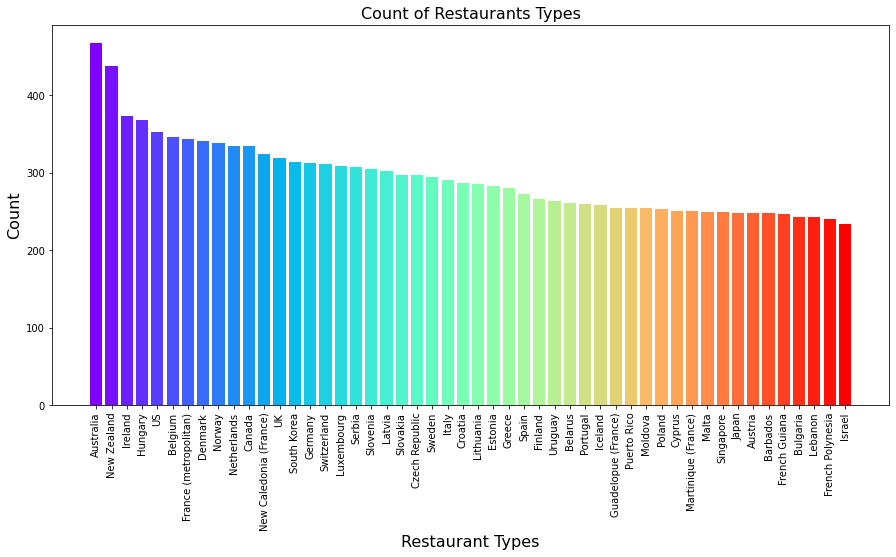

In [ ]:
colors = cm.rainbow(np.linspace(0, 1, len(table)))
plt.figure(figsize = (15, 7))
plt.xticks(rotation = 90)
plt.xlabel("Restaurant Types", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of Restaurants Types", fontsize = 16)
plt.bar(table['Country'], table['Age-standardised rate per 100,000'], color = colors)

In [ ]:
import plotly.express as px

fig = px.bar(table, y='Age-standardised rate per 100,000', x='Country', text='Age-standardised rate per 100,000')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

###PIE-CHART PLOTY

In [ ]:
fig = px.pie(table, values='Age-standardised rate per 100,000', names='Country', title='Breast Cancer Global Rate')
fig.show()

###CHOROPLETH

In [ ]:
import sys
sys.setrecursionlimit(1500)

In [ ]:
MAP = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')

MAP.choropleth(
    geo_data=geojson,
    data=table,
    columns=['Country', 'Age-standardised rate per 100,000'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='BREAST CANCER RATE'
)

MAP

##BREAST CANCER RATE In MENS

> The highest cancer rate was found in Australia at 579.9 men per 100,000.
The age-standardised rate was at least 360 per 100,000 in 15 countries: Australia, New Zealand, Ireland, Hungary, France (metropolitan), the US, Latvia, Belgium, Norway, Slovenia, Estonia, Slovakia, Denmark, New Caledonia (France) and the Netherlands.
The countries in the top ten come from Europe, Oceania and the Americas.

In [ ]:
table = pd.read_html('https://www.wcrf.org/dietandcancer/cancer-trends/data-cancer-frequency-country', index_col = [0])[1]
table.head()

,Country,"Age-standardised rate per 100,000"
Rank,,
1,Australia,579.9
2,New Zealand,526.0
3,Ireland,430.8
4,Hungary,427.1
5,France (metropolitan),405.6


###Getting COORDINATES and Adding to DATAFRAME

In [ ]:
Latitude = []
Longitude = []

for country in tqdm(table.Country):
  try:
    address = country
    geolocator = Nominatim(user_agent="four_square")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    #print('The geograpical coordinate of {} are {}, {}.'.format(country, latitude, longitude))
    Latitude.append(latitude)
    Longitude.append(longitude)
  except:
    print('Error')
    Latitude.append(16.2650) 
    Longitude.append(61.5510)

table['Latitude'] = Latitude
table['Longitude'] = Longitude

table.head()

  6%|▌         | 3/50 [00:03<00:54,  1.16s/it]

Error


100%|██████████| 50/50 [00:43<00:00,  1.15it/s]


,Country,"Age-standardised rate per 100,000",Latitude,Longitude
Rank,,,,
1,Australia,579.9,-24.776109,134.755000
2,New Zealand,526.0,-41.500083,172.834408
3,Ireland,430.8,16.265000,61.551000
4,Hungary,427.1,47.181759,19.506094
5,France (metropolitan),405.6,45.765460,4.832774


###BARGRAPHS using MATPLOTLIB and PLOTY

<BarContainer object of 50 artists>

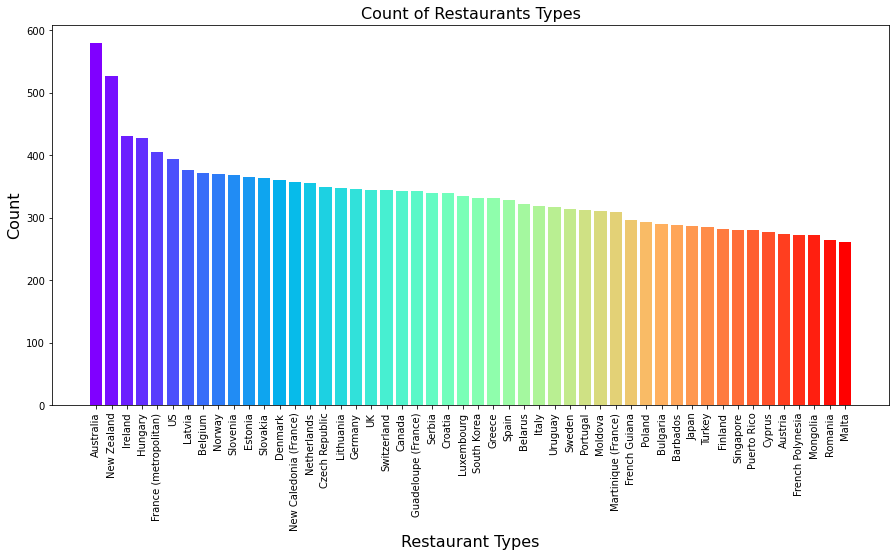

In [ ]:
colors = cm.rainbow(np.linspace(0, 1, len(table)))
plt.figure(figsize = (15, 7))
plt.xticks(rotation = 90)
plt.xlabel("Restaurant Types", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of Restaurants Types", fontsize = 16)
plt.bar(table['Country'], table['Age-standardised rate per 100,000'], color = colors)

In [ ]:
import plotly.express as px

fig = px.bar(table, y='Age-standardised rate per 100,000', x='Country', text='Age-standardised rate per 100,000')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

###PIE-CHART PLOTY

In [ ]:
fig = px.pie(table, values='Age-standardised rate per 100,000', names='Country', title='Breat Cancer Rate in MENS')
fig.show()

###CHOROPLETH

In [ ]:
import sys
sys.setrecursionlimit(1500)

In [ ]:
MAP = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')

MAP.choropleth(
    geo_data=geojson,
    data=table,
    columns=['Country', 'Age-standardised rate per 100,000'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='BREAST CANCER RATE'
)

MAP

##BREAST CANCER RATE In WOMENS

> The highest cancer rate for men and women together was in Australia, at 468.0 people per 100,000.
The age-standardised rate was at least 320 per 100,000 for 12 countries: Australia, New Zealand, Ireland, Hungary, the US, Belgium, France (metropolitan), Denmark, Norway, the Netherlands, Canada and New Caledonia (France).
The countries in the top 12 come from Oceania, Europe and North America.

In [ ]:
table = pd.read_html('https://www.wcrf.org/dietandcancer/cancer-trends/data-cancer-frequency-country', index_col = [0])[2]
table.head()

,Country,"Age-standardised rate per 100,000"
Rank,,
1,Australia,363.0
2,New Zealand,358.3
3,Hungary,330.6
4,Belgium,329.9
5,Canada,329.7


###Getting COORDINATES and Adding to DATAFRAME

In [ ]:
Latitude = []
Longitude = []

for country in tqdm(table.Country):
  try:
    address = country
    geolocator = Nominatim(user_agent="four_square")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    #print('The geograpical coordinate of {} are {}, {}.'.format(country, latitude, longitude))
    Latitude.append(latitude)
    Longitude.append(longitude)
  except:
    print('Error')
    Latitude.append(16.2650) 
    Longitude.append(61.5510)

table['Latitude'] = Latitude
table['Longitude'] = Longitude

table.head()

100%|██████████| 50/50 [00:42<00:00,  1.17it/s]


,Country,"Age-standardised rate per 100,000",Latitude,Longitude
Rank,,,,
1,Australia,363.0,-24.776109,134.755000
2,New Zealand,358.3,-41.500083,172.834408
3,Hungary,330.6,47.181759,19.506094
4,Belgium,329.9,50.640281,4.666715
5,Canada,329.7,61.066692,-107.991707


###BARGRAPHS using MATPLOTLIB and PLOTY

<BarContainer object of 50 artists>

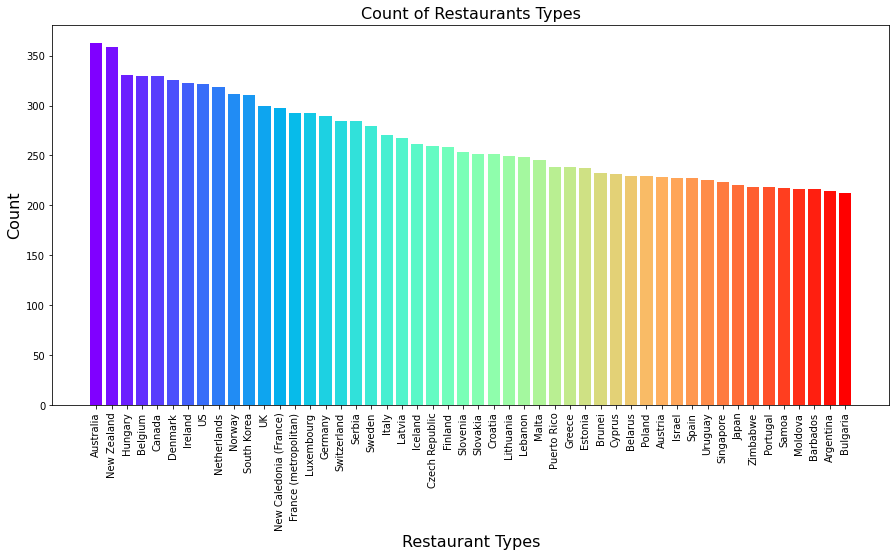

In [ ]:
colors = cm.rainbow(np.linspace(0, 1, len(table)))
plt.figure(figsize = (15, 7))
plt.xticks(rotation = 90)
plt.xlabel("Restaurant Types", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of Restaurants Types", fontsize = 16)
plt.bar(table['Country'], table['Age-standardised rate per 100,000'], color = colors)

In [ ]:
import plotly.express as px

fig = px.bar(table, y='Age-standardised rate per 100,000', x='Country', text='Age-standardised rate per 100,000')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

###PIE-CHART PLOTY

In [ ]:
fig = px.pie(table, values='Age-standardised rate per 100,000', names='Country', title='Breast Cancer Rate in WOMENS')
fig.show()

###CHOROPLETH

In [ ]:
import sys
sys.setrecursionlimit(1500)

In [ ]:
MAP = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')

MAP.choropleth(
    geo_data=geojson,
    data=table,
    columns=['Country', 'Age-standardised rate per 100,000'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='BREAST CANCER RATE'
)

MAP